# Create big precursor

In [1]:
# Load the amrwind-frontend module
amrwindfedir = '/projects/wind_uq/lcheung/amrwind-frontend'  # Location of amrwind-frontend 
import sys, os
sys.path.insert(1, amrwindfedir)

# Load the libraries
import amrwind_frontend  as amrwind
import matplotlib.pyplot as plt
import numpy             as np
import math

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
# Start the AMR-Wind case
case = amrwind.MyApp.init_nogui()

In [3]:
# Load the starting point
inputfile='Neutral_9mps_precursorBig_tall.inp'
case.loadAMRWindInput(inputfile)
outputfile='Neutral_9mps_precursorBig_tall_refined.inp'

CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()


In [4]:
# Compute the lapse rate
Theights = [float(x) for x in case.getAMRWindInput('ABL.temperature_heights').split()]
Tvalues  = [float(x) for x in case.getAMRWindInput('ABL.temperature_values').split()]
lapserate= (Tvalues[-1]-Tvalues[-2])/(Theights[-1]-Theights[-2])
print('lapserate = %f'%lapserate)
case.setAMRWindInput('zhi.temperature',       lapserate) 

lapserate = 0.000150


In [5]:
case.setAMRWindInput('ABL.log_law_height', 5.0)
case.setAMRWindInput('incflo.velocity', None)
case.setAMRWindInput('ABL.Uperiods', 40.0)
case.setAMRWindInput('ABL.Vperiods', 40.0)

## Set the geometry

In [6]:
Lx = 51200.0
Ly = 51200.0
dx = 80.0
dy = 80.0
case.setAMRWindInput('geometry.prob_lo', [ -0.5*Lx, -0.5*Ly, 0.0 ])
case.setAMRWindInput('geometry.prob_hi', [ +0.5*Lx, +0.5*Ly, 15360.0])
case.setAMRWindInput('amr.n_cell',       [int(Lx/dx), int(Ly/dy), 192])
case.setAMRWindInput('amr.max_level',    3)

In [7]:


### ADD REFINEMENT WINDOWS

## -- level 0 --
# Get the default dictionary for refinement window
refinewin = case.get_default_taggingdict()
# Edit the parameters of the refinement window
refinewin['tagging_name']         = 'box1'
refinewin['tagging_shapes']       = 'box1'
refinewin['tagging_type']         = 'GeometryRefinement'
refinewin['tagging_level']        = 0
refinewin['tagging_geom_type']    = 'box'
refinewin['tagging_geom_origin']  = [-0.5*Lx, -0.5*Ly, 0]
refinewin['tagging_geom_xaxis']   = [Lx, 0, 0]
refinewin['tagging_geom_yaxis']   = [0, Ly, 0]
refinewin['tagging_geom_zaxis']   = [0, 0, 2000]
# Add refinement zone to simulation.
case.add_tagging(refinewin)

## -- level 1 --
# Get the default dictionary for refinement window
refinewin = case.get_default_taggingdict()
# Edit the parameters of the refinement window
refinewin['tagging_name']         = 'box2'
refinewin['tagging_shapes']       = 'box2'
refinewin['tagging_type']         = 'GeometryRefinement'
refinewin['tagging_level']        = 1
refinewin['tagging_geom_type']    = 'box'
refinewin['tagging_geom_origin']  = [-0.5*Lx, -0.5*Ly, 0]
refinewin['tagging_geom_xaxis']   = [Lx, 0, 0]
refinewin['tagging_geom_yaxis']   = [0, Ly, 0]
refinewin['tagging_geom_zaxis']   = [0, 0, 1500]
# Add refinement zone to simulation.
case.add_tagging(refinewin)

## -- level 2 --
# Get the default dictionary for refinement window
refinewin = case.get_default_taggingdict()
# Edit the parameters of the refinement window
refinewin['tagging_name']         = 'box3'
refinewin['tagging_shapes']       = 'box3'
refinewin['tagging_type']         = 'GeometryRefinement'
refinewin['tagging_level']        = 2
refinewin['tagging_geom_type']    = 'box'
refinewin['tagging_geom_origin']  = [-0.5*Lx, -0.5*Ly, 0]
refinewin['tagging_geom_xaxis']   = [Lx, 0, 0]
refinewin['tagging_geom_yaxis']   = [0, Ly, 0]
refinewin['tagging_geom_zaxis']   = [0, 0, 1100]
# Add refinement zone to simulation.
case.add_tagging(refinewin)

## Plot the domain

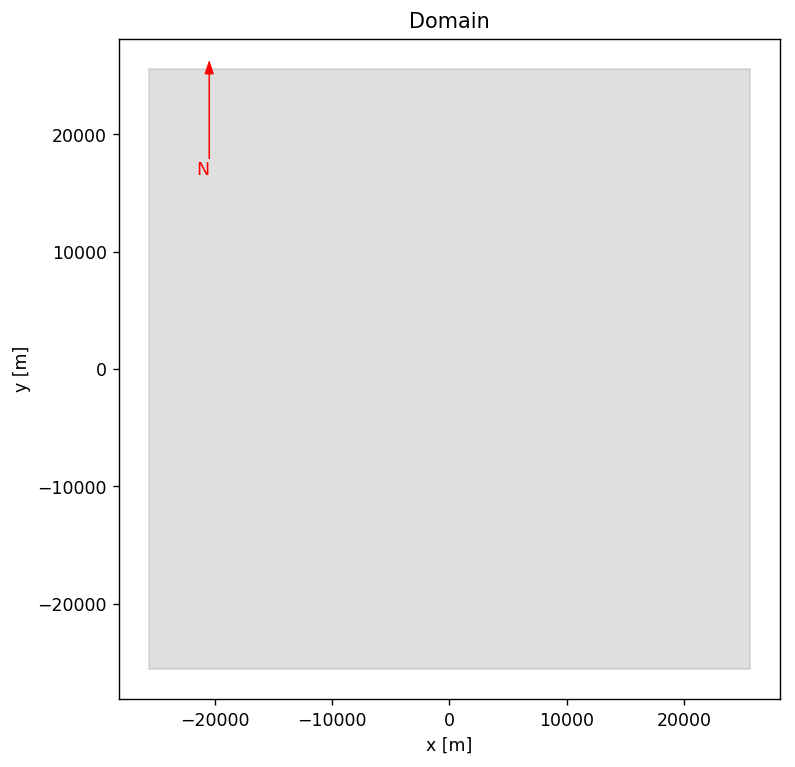

In [8]:
fig, ax = plt.subplots(figsize=(7,7), facecolor='w', dpi=125)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = [] #['p_hub']
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY' 
case.popup_storteddata['plotdomain']['plot_refineboxes']     = [] 
case.plotDomain(ax=ax)

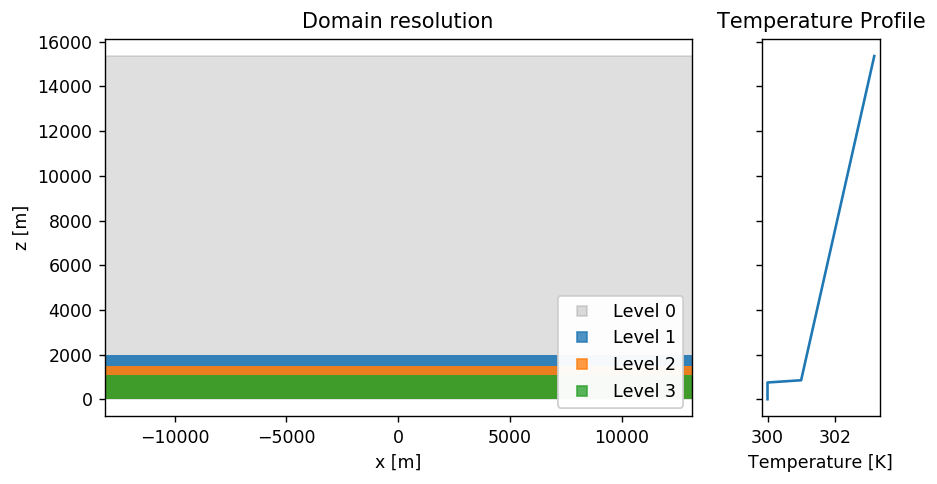

In [9]:
fig, axs = plt.subplots(1,2, figsize=(8,4), facecolor='w', dpi=125, sharey=True, 
                        gridspec_kw={'width_ratios': [5, 1]})

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = [] #['p_hub']
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XZ' 
case.popup_storteddata['plotdomain']['plot_refineboxes']     = ['box1', 'box2', 'box3'] 
case.plotDomain(ax=axs[0])
axs[0].set_title('Domain resolution')
axs[0].set_xlim([-0.5*Lx, 0.5*Lx])
#axs[0].axis('scaled')

case.plotGenericProfile('ABL.temperature_values', 'ABL.temperature_heights', ax=axs[1])
#axs[1].set_ylim([0,16000])
axs[1].set_xlabel('Temperature [K]')
axs[1].set_title('Temperature Profile')

## Add sampling planes

In [10]:
sampleplane = case.get_default_samplingdict()
# Modify the geometry
sampleplane['sampling_name']         = 'p_hub'
sampleplane['sampling_type']         = 'PlaneSampler'
sampleplane['sampling_p_num_points'] = [int(Lx/40.0)+1, int(Ly/40.0)+1]
sampleplane['sampling_p_origin']     = [-0.5*Lx, -0.5*Ly, 0]
sampleplane['sampling_p_axis1']      = [Lx, 0, 0]
sampleplane['sampling_p_axis2']      = [0, Ly, 0]
sampleplane['sampling_p_normal']     = [0, 0, 1]
sampleplane['sampling_p_offsets']    = '30 150 270'
case.add_sampling(sampleplane)

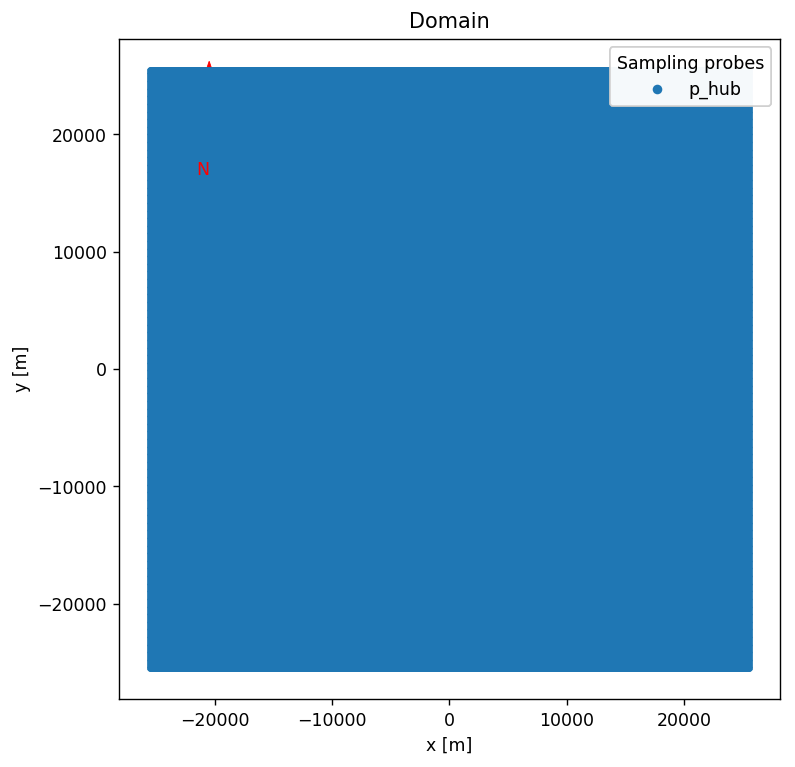

In [11]:
fig, ax = plt.subplots(figsize=(7,7), facecolor='w', dpi=125)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = ['p_hub']
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY' 
case.popup_storteddata['plotdomain']['plot_refineboxes']     = [] 
case.plotDomain(ax=ax)

## Check and validate

In [12]:
check=case.validate()

-- Checking inputs --
[ PASS] max_level:           max_level = 3 >= 0
[ PASS] dt & CFL:            DT and CFL OK
[ PASS] Actuator physics:    incflo.physics and ICNS.source_terms OK for Actuators
[ SKIP] Actuator FST:        No Actuators
[ PASS] Sampling probes:p_hub 

Results: 
 4 PASS
 1 SKIP
 0 FAIL
 0 WARN


In [13]:
# Estimate mesh size
case.estimateMeshSize()

Refinement box1: level 1: 81920000 cells
Refinement box2: level 2: 491520000 cells
Refinement box3: level 3: 2883584000 cells
ESTIMATED MESH SIZE
   Level       Ncells                      Cell Size
       0     78643200             80.0 x 80.0 x 80.0
       1     81920000             40.0 x 40.0 x 40.0
       2    491520000             20.0 x 20.0 x 20.0
       3   2883584000             10.0 x 10.0 x 10.0
  TOTAL:   3535667200


## Write input file

In [14]:
print(case.writeAMRWindInput(outputfile))

# --- Simulation time control parameters ---
time.stop_time                           = 30000.0             # Max (simulated) time to evolve [s]
time.max_step                            = 120000              
time.fixed_dt                            = 0.25                # Fixed timestep size (in seconds). If negative, then time.cfl is used
time.checkpoint_interval                 = 2000                
incflo.physics                           = ABL                 # List of physics models to include in simulation.
incflo.verbose                           = 3                   
io.check_file                            = chk                 
incflo.use_godunov                       = true                
incflo.godunov_type                      = weno_z              
incflo.diffusion_type                    = 1                   # Type of diffusion scheme used.  0 = explicit diffusion, 1 = Crank-Nicolson, 2 = fully implicit
turbulence.model                         = OneEqKsgsM84        